In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop("customerID", axis=1, inplace=True)

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [ ]:
for column in df.select_dtypes(include='object').columns:
    if column != 'Churn':
        df[column] = LabelEncoder().fit_transform(df[column])

In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # You can also include more
X = df[features]
y = df['Churn']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.759772565742715
F1 Score: 0.48632218844984804

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      1033
           1       0.56      0.43      0.49       374

    accuracy                           0.76      1407
   macro avg       0.69      0.65      0.66      1407
weighted avg       0.74      0.76      0.75      1407



In [ ]:
df['Churn_Prob'] = model.predict_proba(scaler.transform(X[features]))[:, 1]
at_risk_customers = df[df['Churn_Prob'] > 0.6]

In [ ]:
print("\nTop At-Risk Customers:")
print(at_risk_customers[['Churn_Prob'] + features].sort_values(by='Churn_Prob', ascending=False).head(10))


Top At-Risk Customers:
      Churn_Prob  tenure  MonthlyCharges  TotalCharges
20           1.0       1           39.65         39.65
39           1.0      11           97.85       1105.40
1993         1.0       1           45.70         45.70
6660         1.0       1           69.15         69.15
207          1.0       1           79.90         79.90
6764         1.0       1           69.20         69.20
2084         1.0       1           69.75         69.75
2095         1.0       1           79.95         79.95
2161         1.0       2           75.80        160.75
2194         1.0       1           79.50         79.50


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
sns.set(style="whitegrid")

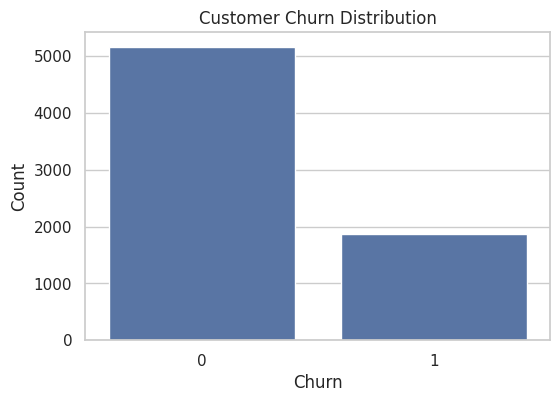

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


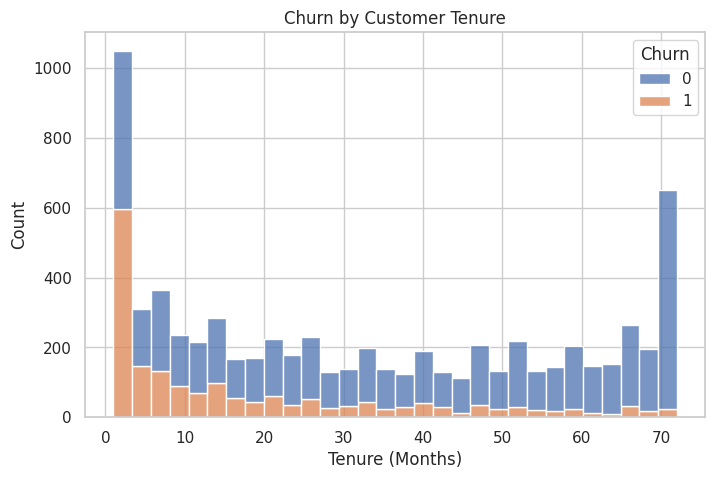

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Churn by Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

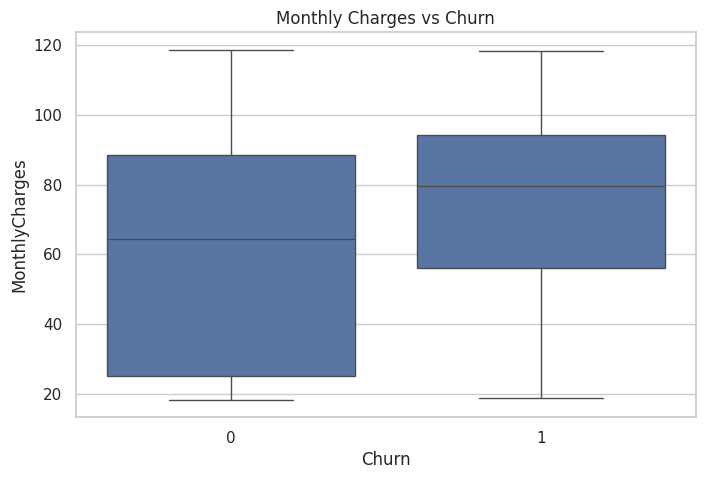

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()


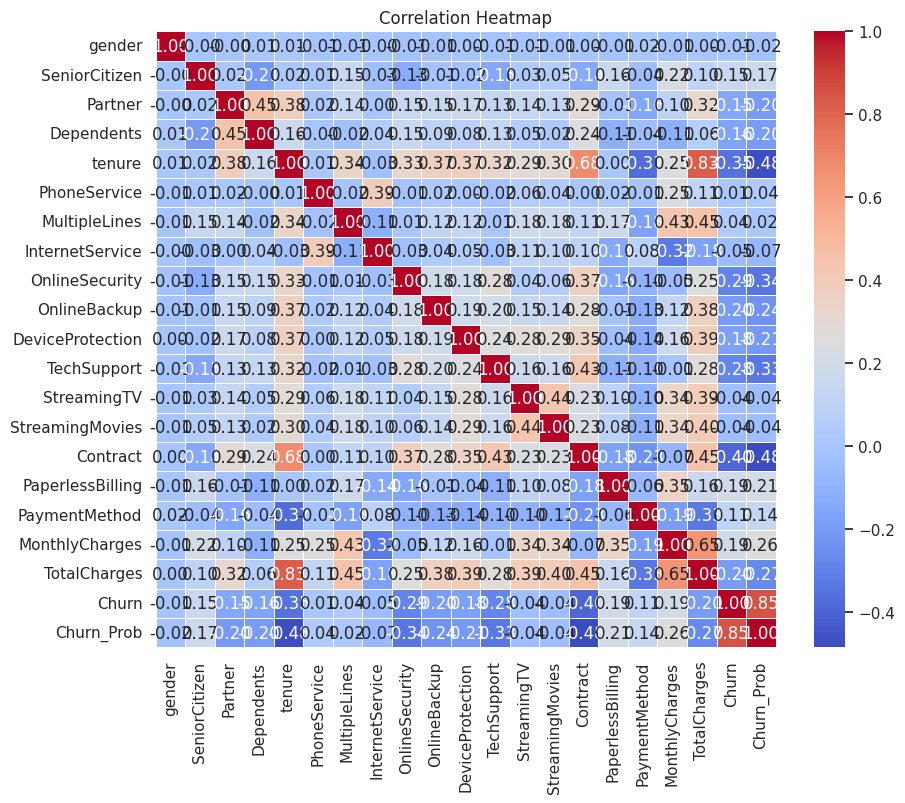

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

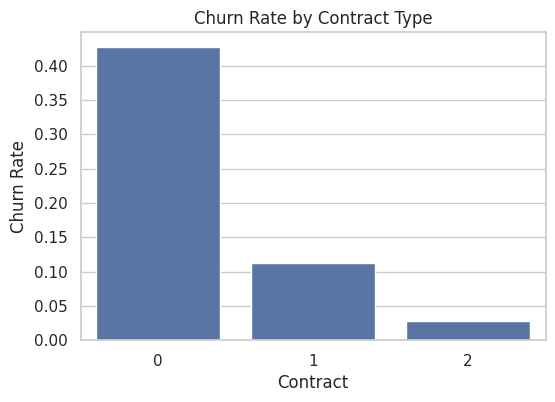

In [ ]:
if 'Contract' in df.columns:
    contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()
    plt.figure(figsize=(6,4))
    sns.barplot(x='Contract', y='Churn', data=contract_churn)
    plt.title('Churn Rate by Contract Type')
    plt.ylabel('Churn Rate')
    plt.show()


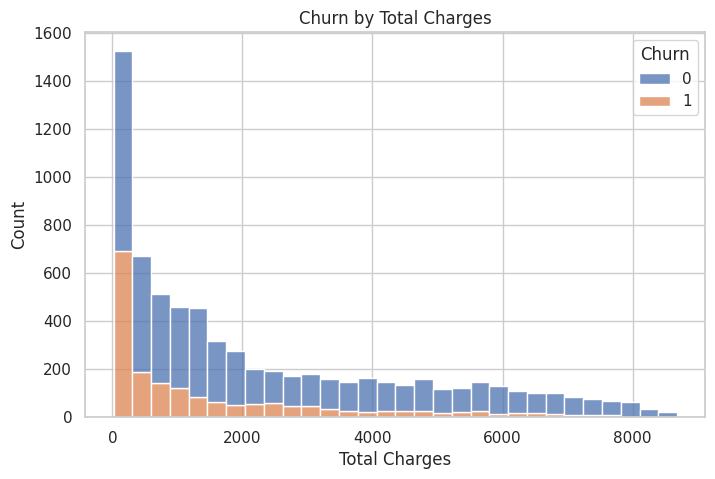

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='TotalCharges', hue='Churn', bins=30, multiple='stack')
plt.title('Churn by Total Charges')
plt.xlabel('Total Charges')
plt.show()

In [ ]:
importances = model.feature_importances_
feature_names = features

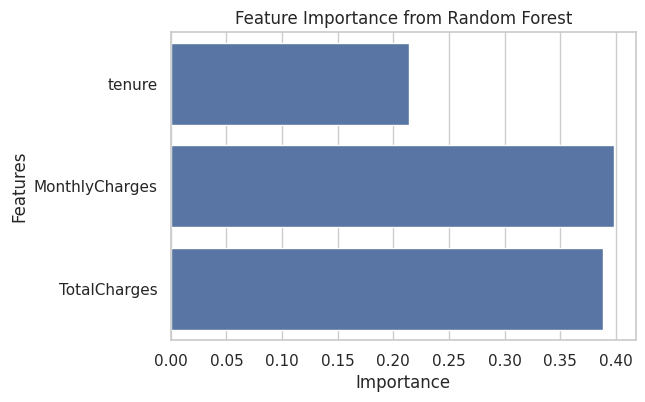

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [ ]:
def predict_churn_with_name(name, tenure, monthly_charges, total_charges):
    import pandas as pd

    input_data = pd.DataFrame([[tenure, monthly_charges, total_charges]],
                              columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

    input_scaled = scaler.transform(input_data)


In [ ]:
name = input("Enter customer name: ")
tenure = float(input("Enter tenure (in months): "))
monthly_charges = float(input("Enter monthly charges: "))
total_charges = float(input("Enter total charges: "))

predict_churn_with_name(name, tenure, monthly_charges, total_charges)

Enter customer name: alice jhonson
Enter tenure (in months): 6
Enter monthly charges: 85.5
Enter total charges: 510
